## Часть первая. Исследование одномерной выборки.
### Вариационный ряд

In [873]:
import math
import pandas as pd
data = pd.read_csv('sample_100.csv', sep=';')['Crime_rate']
d_max, d_min = data.max(), data.min()
k = 1 + 3.22 * math.log10(len(data))
k = 6
N = len(data)
h = math.ceil((d_max - d_min) / k)
print(f'Xmin = {d_min}; Xmax = {d_max}')
print(f'K = {k}; H = {h}')
print(f'N = {N}')
data

Xmin = 0; Xmax = 636
K = 6; H = 106
N = 94


0     137
1     255
2     223
3     117
4     297
     ... 
89     40
90    144
91    360
92     40
93    215
Name: Crime_rate, Length: 94, dtype: int64

In [874]:
series = {}
interval_starts = []
interval_ends = []
for i in range(math.ceil(k)):
    c_min = d_min + h * i
    c_max = c_min + h
    interval_starts.append(c_min)
    interval_ends.append(c_max)
    series[f'({c_min}; {c_max}]'] = data[(data > c_min) & (data <= c_max)].tolist()
series[f'({d_min}; {d_min + h}]'] = data[(data >= d_min) & (data <= d_min + h)].tolist()
series_n = pd.DataFrame({key: len(series[key]) for key in series}, index=['Count']).T
series_n['Centers'] = [(x[0] + x[1]) / 2 for x in zip(interval_starts, interval_ends)]
series_n['Relative'] = series_n['Count'] / N
print('Вариационный ряд:')
series_n[['Count']].T

Вариационный ряд:


,(0; 106],(106; 212],(212; 318],(318; 424],(424; 530],(530; 636]
Count,31,25,14,10,8,6


### Полигон и гистограмма частот

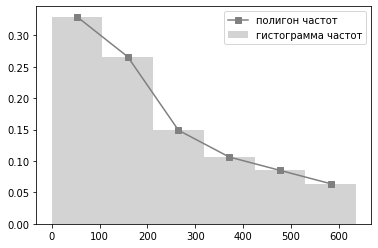

In [875]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(series_n['Centers'], series_n['Relative'], marker='s', label='полигон частот', color='gray')
plt.bar(np.array(interval_starts) + h / 2, series_n['Relative'], h, label='гистограмма частот', color='lightgray')
plt.legend()

plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.savefig('../images/fig01.png', dpi=500)

In [876]:
series_n.T

,(0; 106],(106; 212],(212; 318],(318; 424],(424; 530],(530; 636]
Count,31.000000,25.000000,14.000000,10.000000,8.000000,6.00000
Centers,53.000000,159.000000,265.000000,371.000000,477.000000,583.00000
Relative,0.329787,0.265957,0.148936,0.106383,0.085106,0.06383


### Эмпирическая функция распределения

In [877]:
cumulative = [0.0]
for v in series_n['Relative']:
    cumulative.append(cumulative[-1] + v)
cumulative.append(1.0)
[round(x, 3) for x in cumulative]

[0.0, 0.33, 0.596, 0.745, 0.851, 0.936, 1.0, 1.0]

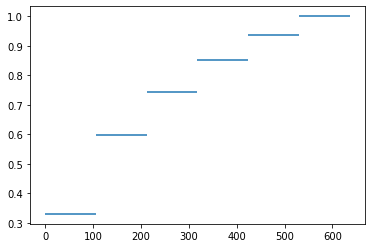

In [889]:
plt.hlines(cumulative[1:-1], interval_starts, interval_ends)
plt.savefig('../images/fig02.png', dpi=500)

### Выборочная средняя

In [879]:
# несмещённая оценка генеральной средней
mean = (series_n['Count'] * series_n['Centers']).sum() / N
mean

216.51063829787233

### Выборочная дисперсия

In [880]:
disp = (series_n['Count'] * (series_n['Centers'] - mean) ** 2).sum() / N
disp

26934.100950656408

### Исправленная дисперсия

In [881]:
s_2 = N * disp / (N - 1)
s_2

27223.714939373145

### Среднее квадратическое

In [882]:
sigma = math.sqrt(disp)
s = math.sqrt(s_2)
s, sigma

(164.99610583093514, 164.11612032538548)

### Ассиметрия

In [883]:
assim = (series_n['Count'] * (series_n['Centers'] - mean) ** 3).sum() / (N * s ** 3)
assim

0.7932791919760075

### Эксцесс

In [884]:
ex = (series_n['Count'] * (series_n['Centers'] - mean) ** 4).sum() / (N * s ** 4) - 3
ex

-0.5126805504012646

### Доверительные интервалы

In [885]:
ty = 1.96
delta = ty * s / math.sqrt(N)
print(delta)
print(f'{mean - delta} < a < {mean + delta}')

33.35537586438221
183.15526243349012 < a < 249.86601416225454


### Уровень значимости

In [886]:
import scipy
def laplace(x):
    return scipy.stats.norm.cdf(x) - 0.5

In [887]:
t1 = (np.array(interval_starts) - mean) / s
t2 = (np.array(interval_ends) - mean) / s
t3 = laplace(t1)
t4 = laplace(t2)
t5 = t4 - t3
t6 = N * t5
t7 = (series_n['Count'].values - t6) ** 2 / t6
table2 = pd.DataFrame([interval_starts, interval_ends, series_n['Count'], t1, t2, t3, t4, t5, t6, t7]).T
table2

,0,1,2,3,4,5,6,7,8,9
0,0.0,106.0,31.0,-1.312217,-0.669777,-0.405276,-0.248500,0.156776,14.736979,17.947086
1,106.0,212.0,25.0,-0.669777,-0.027338,-0.248500,-0.010905,0.237595,22.333952,0.318251
2,212.0,318.0,14.0,-0.027338,0.615102,-0.010905,0.230756,0.241661,22.716138,3.344365
3,318.0,424.0,10.0,0.615102,1.257541,0.230756,0.395721,0.164965,15.506702,1.955527
4,424.0,530.0,8.0,1.257541,1.899980,0.395721,0.471282,0.075561,7.102740,0.113347
5,530.0,636.0,6.0,1.899980,2.542420,0.471282,0.494496,0.023213,2.182065,6.680200


In [888]:
r = k - 2 - 1
x_2 = t7.sum()
scipy.stats.chi2.sf(x_2, r), x_2

(1.1598852271470995e-06, 30.358776834854368)